<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Taller guiado de manejo de dataframes con Pandas**

Este taller guiado tiene como objetivo hacer un acercamiento práctico del uso del paquete numpy y pandas. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En la parte superior derecha encontrará un botón que dice "Añadir a Drive", de esa manera podrá guardar y editar el contenido de este notebook.

## **1. Instalar e importar pandas y otras librerías útiles**

In [31]:
!pip install -U pandas

Traceback (most recent call last):
  File "c:\python38\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\python38\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Python38\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


In [32]:
# pd y np son los alias más empleados para estas 2 librerías

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [33]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)

Python 3.8.5
NumPy 1.23.0
Pandas 1.4.3
Matplotlib 3.5.2


## **2. Tipos de objetos en pandas**

Existen 2 estructuras de datos fundamentales en pandas. Toda la funcionalidad de la librería pandas depende del entendimiento de estos dos objetos.

* Series
* Dataframes

### **2.1 Series**

Las Series son arreglos unidimensionales cuyos elementos están identificados por un índice, este índice puede ser numérico o una etiqueta. La serie está conformada por dos arreglos de numpy, uno aloja los valores y otro los índices para cada valor. Las series pueden ser creadas usando la función `pd.Series`. Está función admite varios tipos de datos como argumentos.
* Listas o tuplas
* Diccionarios
* Arreglos de numpy


In [34]:
ciudades = ['Bogotá', 'Cali', 'Medellín','Barranquilla']

# Note que no estamos guardando un objeto con la información de la serie ya que no se está asignando a una variable
pd.Series(ciudades) # lista

0          Bogotá
1            Cali
2        Medellín
3    Barranquilla
dtype: object

In [35]:
habitantes = (11344000,2228000,2569000,1206000)

# Note que aquí hemos creado un objeto Series alojado en memoria
pd.Series(data = habitantes, # tupla
          index = ciudades) # lista


Bogotá          11344000
Cali             2228000
Medellín         2569000
Barranquilla     1206000
dtype: int64

In [36]:
datos = {
    'Bogotá':11344000,
    'Cali':2228000,
    'Medellin':2569000 ,
    'Barranquilla':1206000 
}

habitantes_ciudad = pd.Series(datos, name='poblacion') # diccionario
habitantes_ciudad

Bogotá          11344000
Cali             2228000
Medellin         2569000
Barranquilla     1206000
Name: poblacion, dtype: int64

### **2.2 DataFrame**

Los objetos DataFrame son el objeto principal de pandas. Y será dónde vamos a almacenar nuestros datos para analizarlos. Este objeto representa un tabla, cada fila está descrita por un índice y a su vez cada columna es un objeto Series.

Tal cómo hemos visto antes, por convención las columnas son las variables de estudio mientras que las filas son las observaciones del objeto de estudio.

Para crear DataFrames usamos la función `pd.DataFrames` que a su vez recibe varias estructuras de datos como argumentos.

In [37]:
datos = {
    'nombre_ciudad': ['Bogotá', 'Cali', 'Medellín','Barranquilla'],
    'poblacion' : (11344000,2228000,2569000,1206000),
    'altura' : np.array([2640,1018,1495,18])
}

# En este ejemplo el objeto de estudio son las ciudades
# Y cada columna es una variable con la que podemos describir a cada ciudad
ciudades = pd.DataFrame(datos)
ciudades

,nombre_ciudad,poblacion,altura
0,Bogotá,11344000,2640
1,Cali,2228000,1018
2,Medellín,2569000,1495
3,Barranquilla,1206000,18


## **3. Atributos**

Veremos algunos atributos para ambos tipos de objetos, algunos de ellos son heredados de Numpy. Recuerde que la librería Pandas está escrita sobre Numpy. 

Para acceder a un atributo se usa el símbolo `.`

Iniciemos con diferentes métodos válidos para **Series**. Para consultar todos los atributos y métodos disponibles consulte [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).



In [38]:
habitantes_ciudad

Bogotá          11344000
Cali             2228000
Medellin         2569000
Barranquilla     1206000
Name: poblacion, dtype: int64

In [39]:
# Importante siempre reconocer con qué objeto estamos tratando

type(habitantes_ciudad)

pandas.core.series.Series

In [40]:
# Extraer los valores de la Serie

habitantes_ciudad.values

array([11344000,  2228000,  2569000,  1206000], dtype=int64)

In [41]:
# Extraer el índice de la Serie

habitantes_ciudad.index

Index(['Bogotá', 'Cali', 'Medellin', 'Barranquilla'], dtype='object')

In [42]:
# Extraer el nombre de la Serie

habitantes_ciudad.name

'poblacion'

In [43]:
# Extraer el número de elementos del arreglo de numpy dentro de la Serie
habitantes_ciudad.size

4

In [44]:
# Retorna una tupla con el tamaño de las dimensiones del arreglo de Numpy dentro de la Serie (filas,columnas)

habitantes_ciudad.shape

(4,)

In [45]:
# Retorna la tipología de los valores de la Serie

habitantes_ciudad.dtype

dtype('int64')

Ahora exploremos algunos atributos de los **DataFrames**. Notará que algunos atributos son idénticos a los vistos para las Series.

Para consultar todos lo métodos y atributos disponibles para este objeto consulte [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame).

In [46]:
ciudades

,nombre_ciudad,poblacion,altura
0,Bogotá,11344000,2640
1,Cali,2228000,1018
2,Medellín,2569000,1495
3,Barranquilla,1206000,18


In [47]:
type(ciudades)

pandas.core.frame.DataFrame

In [48]:
# Retorna los valores de las 3 variables

ciudades.values

array([['Bogotá', 11344000, 2640],
       ['Cali', 2228000, 1018],
       ['Medellín', 2569000, 1495],
       ['Barranquilla', 1206000, 18]], dtype=object)

In [49]:
# Retorna un objeto tipo indice, parecido al que se crea con la función range()

ciudades.index

RangeIndex(start=0, stop=4, step=1)

In [50]:
# Retorna los nombres de las columnas del dataframe

ciudades.columns

Index(['nombre_ciudad', 'poblacion', 'altura'], dtype='object')

Como se dijo anteriomente, cada fila y columna de un DataFrame es una Serie. A continuación se muestra como se puede acceder a solamente una columna del DataFrame.

In [51]:
# Retorna la Serie correspondiente a la columna especificada
# Filtro

ciudades['nombre_ciudad']

0          Bogotá
1            Cali
2        Medellín
3    Barranquilla
Name: nombre_ciudad, dtype: object

In [52]:
type(ciudades['nombre_ciudad'])

pandas.core.series.Series

Ahora bien, si lo que desea es tener un dataframe, se puede hacer uso de doble corchete cuadrado. Veamos:

In [53]:
# Retorna el dataframe correspondiente que contiene las series específicadas entres los corchetes internos
# Filtro

ciudades[['nombre_ciudad']]

,nombre_ciudad
0,Bogotá
1,Cali
2,Medellín
3,Barranquilla


Ahora verifique el tipo de objeto

In [54]:
type(ciudades[['nombre_ciudad']])

pandas.core.frame.DataFrame

In [55]:
ciudades.size

12

In [56]:
# A diferencia de las Series, se puede observar como hay una segunda dimensión, correspondiente a las columnas
ciudades.shape   

(4, 3)

In [57]:
ciudades.dtypes

nombre_ciudad    object
poblacion         int64
altura            int32
dtype: object

## **4. Importar y exportar datos**

Los objetos Series y DataFrames vistos anteriormente tienen métodos para exportar los datos en diversos formatos. Para un formato en especial se recomienda consultar la [documentación](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv).

In [58]:
ciudades.to_csv('ciudades.csv', sep = ';')

# Luego de ejecutar esta celda puede encontrar el archivo en el panel de Archivos a la izquierda

In [59]:
ciudades.to_excel('ciudades.xls', sheet_name= 'hoja_ejemplo')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_24880\874970547.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  ciudades.to_excel('ciudades.xls', sheet_name= 'hoja_ejemplo')


ModuleNotFoundError: No module named 'xlwt'

Pandas contiene diversas funciones que permiten leer todo tipo de archivos, desde archivos separados por comas (csv) hasta JSON (JavaScript Object Notation). Se pueden leer archivos usando diferentes formas, la recomendada para el caso de Google Colab es con el uso de un repositorio de GitHub. Otras alternativas fueron discutidas en clase también.

* Subir archivo local a Colab
* Desde Google Drive

Recuerde que para nombrar las funciones de pandas iniciamos con el alias `pd`. Por ejemplo para leer un archivo csv usamos la función
`
pd.read_csv ()
`
Puede consultar más información sobre está y otras funciones en la documentación oficial de Pandas [aquí](https://pandas.pydata.org/docs/).


In [ ]:
# Utilice nombres sencillos y descriptivos para nombrar sus variables

housing = pd.read_csv("https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Housing.csv")

In [ ]:
# ¿Qué tipo de objeto es housing?

type(housing)

pandas.core.frame.DataFrame

## **5. Datos a emplear**

Para este taller vamos a emplear el dataset housepricing, para mayor información consulte:

* https://www.kaggle.com/ashydv/housing-dataset

### Resumen

El dataset housing está conformado por 13 variables y 545 observaciones. En este dataset se resumen algunas características de viviendas y el precio de las viviendas. 

|Variable|Descripción|Tipología|
|---|---|---|
|price| Precio (USD)|Cuantitativa continua|
|area|Área del predio (pies cuadrados)|Cuantitativa continua|
|bedrooms|Cantidad de habitaciones|Cuantitativa discreta|
|bathrooms|Cantidad de baños|Cuantitativa discreta|
|stories|Cantidad de pisos-niveles|Cuantitativa discreta|
|mainroad|Ubicación sobre una calle principal|Cualitativa binaria|
|guestroom|Cuarto para invitados|Cualitativa binaria|
|basement|Sotano|Cualitativa binaria|
|hotwaterheating|Calentador de agua|Cualitativa binaria|
|airconditioning|Aire acondicionado|Cualitativa binaria|
|parking|Cantidad de parqueaderos|Cuantitativa discreta|
|prefarea|Barrio o zona privilegiada de la ciudad|Cualitativa binaria|
|furnishing status|Estado de amoblamiento|Cualitativa ordinal|

## **6. Descripción general**

A continuación veremos algunos métodos y atributos útiles para el entendimiento de los datos.

In [ ]:
housing.shape

(545, 13)

El dataset de trabajo tiene 545 observaciones (filas) y 13 variables/características (columnas).

In [ ]:
# Vista de las primeras 5 filas
# Modifique para ver las primeras 20 observaciones

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Vista de las últimas 5 filas

housing.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


El método `DataFrame.info()` retorna un resumen interesante que incluye:
* dimensiones del DataFrame 
* el nombre de las variables
* el conteo de valores no nulos 
* la tipología de cada variable.





In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Podemos observar los nombres de las 13 variables que componen el dataset. De las cuales 6 son tipo entero y 7 son tipo object. También podemos observar que no hay valores nulos dentro del dataset.

## **7. Estadística descriptiva**

El método `DataFrame.describe()` es quizá una de las mejores maneras de conocer rápidamente los datos ya que presenta un resumen estadístico completo de cada variable. Para datos numéricos el resumen incluye:
* conteo
* promedio
* desviación estándar
* valor mínimo y máximo (rango)
* cuartiles - percentiles 25,50 (mediana)y 75 

In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


El método `DataFrame.describe()` también permite hacer un resumen para variables categóricas. El resumen incluye:
* conteo
* cantidad de valores únicos
* etiqueta con mayor frecuencia - moda
* frecuencia de la moda

In [ ]:
housing.describe(include = 'object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


Veamos ahora como podemos calcular algunos descriptores únicamente para la variable precio. Podemos filtrar una variable de un dataset usando esta estructura `df['Nombre de la variable']` más adelante vamos a desarrollar funciones avanzadas empleando esta misma estructura.



In [ ]:
housing['price']

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
type(housing['price'])

pandas.core.series.Series

In [ ]:
# Retorna el conteo de todos los valores no nulos

print('Conteo :', housing['price'].count())

# Retorna la suma de la serie

print('El precio de todas las casas suma: ', housing['price'].sum())

# Retorna el mínimo de la serie

print('El valor mínimo es : ', housing['price'].min() )

# Retorna el máximo de la serie

print('El valor mínimo es : ', housing['price'].max() )

# Retorna la media de una serie

print('La media del precio es: ',housing['price'].mean())

# Retorna la mediana de una serie

print('La mediana del precio es: ',housing['price'].median())

# Retorna los cuantiles listados de la serie o dataframe

print('Percentil 50 y 99 del precio\n',housing['price'].quantile([0.5,0.99]))

# Retorna la varianza de una serie

print('La desviación estándar del precio: ',housing['price'].std())




Conteo : 545
El precio de todas las casas suma:  2597867440
El valor mínimo es :  1750000
El valor mínimo es :  13300000
La media del precio es:  4766729.247706422
La mediana del precio es:  4340000.0
Percentil 50 y 99 del precio
 0.50     4340000.0
0.99    10542000.0
Name: price, dtype: float64
La desviación estándar del precio:  1870439.615657394


In [ ]:
# Note que si usa cualquiera de los métodos anteriores sobre el dataframe completo obtendrá el cálculo para todas las variables que corresponda

housing.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

### **Ejercicios**

Usando los métodos vistos.
1. Calcule el rango de la variable precio.
2. Calcule el coeficiente de variación para la variable precio y área. El coeficiente de variación (CV) de la variable X está definido como:
$$ CV (X) = \frac{std(X)*100}{mean(X)} $$
Donde:

$CV (X)$ es el coeficiente de variación de la variable $X$

$std(X)$ es la desviación estándar de la variable $X$

$mean(X)$ es la media de la variable $X$

Cuando se trata de variables categóricas (o numéricas discretas) deseamos saber los posibles valores de esa variable y también el conteo de valores por cada categoria.

In [ ]:
# Veamos cuántos valores posibles toma la variable furnishingstatus

housing['furnishingstatus'].nunique()

3

In [ ]:
# Veamos ahora cuales son esos posibles valores

housing['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
# Hagamos un conteo  por categoría de esta variable

housing['furnishingstatus'].value_counts() 

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
# Este objeto se puede operar, por ejemplo para obtener un porcentaje

housing['bathrooms'].value_counts()*100 / housing.shape[0]

# Note que housing.shape retorna una tupla con las dimensiones del df
# [0] retorna la primera posición de la tupla que es el número de filas

1    73.577982
2    24.403670
3     1.834862
4     0.183486
Name: bathrooms, dtype: float64

In [ ]:
# Se puede utilizar la opción de normalización
# También se puede determinar si el orden es descendente o ascendente

housing['bedrooms'].value_counts(normalize = True, ascending = True)*100

# para descendente coloque ascending = False 

6     0.366972
1     0.366972
5     1.834862
4    17.431193
2    24.954128
3    55.045872
Name: bedrooms, dtype: float64

In [ ]:
housing[['bathrooms']].value_counts(normalize = True, ascending = True)

bathrooms
4            0.001835
3            0.018349
2            0.244037
1            0.735780
dtype: float64

## **8. Agrupación de datos**

Pandas ofrece métodos para realizar operaciones de agrupación y combinación de datos dentro de un mismo objeto. Estas operaciones consisten de 3 fases:

1.  **Separar** los datos en grupos basándose en algunos criterios.
2.  **Aplicar** una función a cada grupo. Estas funciones pueden ser de agregación, transformación o filtrado.
3.  **Combinar** los resultados de la función en una estructura de datos nueva, como un DataFrame o Serie.


Esto es posible con el método `DataFrame.groupby`, que realiza un agrupamiento respecto a los criterios definidos en su argumento.

Vamos a agrupar el DataFrame housing por el número de habitaciones.

In [ ]:
# pasamos como parámetro la variable respecto a la cuál queremos agrupar

housing.groupby('bedrooms')

El producto de esta agrupación es un objeto de tipo groupby, este objeto es iterable y contiene el nombre de cada grupo y además un subconjunto (dataframe) para cada grupo generado. Veamos el contenido del groupby usando un ciclo for.

In [ ]:
for nombre, grupo in housing.groupby('bedrooms'):
  print('Nombre del grupo: ',nombre)
  print(grupo)

Nombre del grupo:  1
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
445  3150000  3450         1          1        1      yes        no       no   
528  2275000  3970         1          1        1       no        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
445              no              no        0       no        furnished  
528              no              no        0       no      unfurnished  
Nombre del grupo:  2
       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
61   7070000   8880         2          1        1      yes        no       no   
66   6930000  13200         2          1        1      yes        no      yes   
73   6685000   6600         2          2        4      yes        no      yes   
91   6419000   6750         2          1        1      yes       yes      yes   
114  6020000   6800         2          1        1      yes       yes      yes   
..       ...

Como puede observar, para esta agrupación particular obtenemos 5 grupos, cada grupo contiene un DataFrame con las observaciones que tienen 1,2..hasta 5 habitaciones. Para obtener un grupo en particular se puede usar el método `get_group()` con el nombre del grupo.



In [ ]:
# Retorna solo el subconjunto de casas que tienen 4 habitaciones

housing.groupby('bedrooms').get_group(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2940000,3660,4,1,2,no,no,no,no,no,0,no,unfurnished
487,2870000,5400,4,1,2,yes,no,no,no,no,0,no,unfurnished
488,2852500,5200,4,1,3,yes,no,no,no,no,0,no,unfurnished
523,2380000,2787,4,2,2,yes,no,no,no,no,0,no,furnished


Lo más interesante de este tipo de objetos es aplicarles diversas funciones para analizar los datos. Por ejemplo, calculemos el precio promedio de las casas dependiendo de la cantidad de habitaciones.

In [ ]:
# Agrupa por número de habitaciones, filtra la variable precio, calcula la media del precio para cada grupo

housing.groupby('bedrooms')['price'].mean() # óptima

bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64

In [ ]:
# Tenga presente el orden, puede dar el mismo resultado pero el proceso es diferente
# Agrupa por número de habitaciones, calcula la media para todas las variables en todos los grupos, filtra la variable precio

housing.groupby('bedrooms').mean()['price']

bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: price, dtype: float64

In [ ]:
# Note que si no añade un filtro se calcula la media para todas las variables

housing.groupby('bedrooms').mean()

,price,area,bathrooms,stories,parking
bedrooms,,,,,
1,2.712500e+06,3710.000000,1.000000,1.000000,0.000000
2,3.632022e+06,4636.235294,1.058824,1.169118,0.492647
3,4.954598e+06,5226.620000,1.266667,1.933333,0.723333
4,5.729758e+06,5582.063158,1.621053,2.305263,0.915789
5,5.819800e+06,6291.500000,1.800000,2.000000,0.600000
6,4.791500e+06,3950.000000,1.500000,2.000000,0.500000


Ahora hagamos un proceso de agregación más complejo, obtengamos el precio promedio y la menor área en función de la cantidad de habitaciones. Para eso vamos a usar el método `groupby.agg()`. El cual recibe un diccionario con las indicaciones de agregación.



In [ ]:
housing.groupby('bedrooms').agg({ 'price' : 'mean', 'area' : 'min' })

# Puede hacer la agregación de tantas variables como desee

,price,area
bedrooms,,
1,2.712500e+06,3450
2,3.632022e+06,1836
3,4.954598e+06,1650
4,5.729758e+06,2145
5,5.819800e+06,1905
6,4.791500e+06,3600


In [ ]:
housing.groupby('bedrooms').agg({  'area' : ['min','max'], 'price': ['mean','median'] })

# También puede aplicar dos funciones de agregación diferentes a la misma variable

area                price           
           min    max          mean     median
bedrooms                                      
1         3450   3970  2.712500e+06  2712500.0
2         1836  13200  3.632022e+06  3535000.0
3         1650  15600  4.954598e+06  4620000.0
4         2145  12090  5.729758e+06  5250000.0
5         1905  16200  5.819800e+06  5582500.0
6         3600   4300  4.791500e+06  4791500.0

Por último hagamos una agrupación usando dos variables, furnishingstatus y prefarea y calculemos el precio promedio para cada categoría.

In [ ]:
# Note que obtenemos 6 salidas, dado que una variable tiene 3 posibles niveles y la otra 2

housing.groupby(['furnishingstatus','prefarea'])['price'].mean()

furnishingstatus  prefarea
furnished         no          5.121072e+06
                  yes         6.340779e+06
semi-furnished    no          4.614918e+06
                  yes         5.892257e+06
unfurnished       no          3.731000e+06
                  yes         5.256576e+06
Name: price, dtype: float64

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing['price_million'] = housing['price']/1e6
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


In [ ]:
# ¿Y por qué solo ver la media si podemos hacer un resumen completo para cada categoría?

housing.groupby(['furnishingstatus','prefarea'])['price_million'].describe()

count      mean       std      min      25%  \
furnishingstatus prefarea                                                
furnished        no         97.0  5.121072  1.987760  1.75000  3.71000   
                 yes        43.0  6.340779  2.181209  3.29000  4.93500   
semi-furnished   no        175.0  4.614918  1.356600  1.76715  3.74500   
                 yes        52.0  5.892257  1.932874  3.11885  4.61125   
unfurnished      no        145.0  3.731000  1.610807  1.75000  2.69500   
                 yes        33.0  5.256576  1.654403  2.23300  3.92000   

                              50%    75%     max  
furnishingstatus prefarea                         
furnished        no        4.4800  6.195  12.250  
                 yes       6.1950  7.140  13.300  
semi-furnished   no        4.3400  5.040   9.681  
                 yes       5.4915  6.195  12.250  
unfurnished      no        3.2900  4.200  10.150  
                 yes       5.2500  6.230   9.800

## **9. Ordenamiento**

Existen 3 funciones principales que nos ayudan a organizar nuestros datos, aplica para Series o DataFrames.

In [ ]:
housing['area'].sort_values()

449     1650
537     1700
527     1836
271     1905
413     1950
       ...  
403    12944
10     13200
66     13200
125    15600
7      16200
Name: area, Length: 545, dtype: int64

In [ ]:
# Cuando se aplica sobre df es obligatorio el uso del argumento by
# Se puede modificar si es ascendente o descendente con el parámetro ascending
# order by

housing.sort_values(by = 'price', ascending = True)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,1.75000
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1.75000
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1.75000
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1.76715
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1.82000


In [ ]:
# Es posible solamente traer las primeras observaciones usando head()

housing.sort_values(by = 'area', ascending = False).head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished


Hay dos variaciones que permiten recuperar los n valores más grandes o más pequeños.

In [ ]:
# Las 5 casas con el precio más alto

housing.nlargest(5,'area')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,10.150
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished,5.943
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,9.800
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished,6.930
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished,3.500


In [ ]:
# Las 5 casas con el precio más bajo

housing.nsmallest(5,'price')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished


## **10. Selección**

Pandas disntigue dos tipos de índices en sus objetos. Esto es las etiquetas y la posición de los objetos. A continuación les mostraré algunas formas en las que se pueden crear subconjuntos a partir de Series o DataFrames.

In [ ]:
# retomemos nuestra Serie

habitantes_ciudad

Bogotá          11344000
Cali             2228000
Medellin         2569000
Barranquilla     1206000
Name: poblacion, dtype: int64

Al igual que como hacíamos con una lista, podemos consultar un objeto particular de una serie usando la estructura `Series[a]` donde a es la etiqueta o posición de una determinada fila.


In [ ]:
# retorna la población de Barranquilla

habitantes_ciudad[3]

1206000

In [ ]:
# retorna la población de Bogotá
habitantes_ciudad['Bogotá']

11344000

In [ ]:
# Así mismo podemos modificar alguna de las entradas
# Recuerde ser cuidadoso con esta funcionalidad

habitantes_ciudad['Bogotá'] = 0
habitantes_ciudad

Bogotá                0
Cali            2228000
Medellin        2569000
Barranquilla    1206000
Name: poblacion, dtype: int64

Para recuperar varios valores incluimos una lista `Series[[A,B,C]]`. En este caso se retorna no solamente el valor sino la pareja etiqueta - valor.




In [ ]:
# Usando la posición

habitantes_ciudad[[0,3,1]]

Bogotá                0
Barranquilla    1206000
Cali            2228000
Name: poblacion, dtype: int64

In [ ]:
# O usando la etiqueta que identifica la observación

habitantes_ciudad[['Bogotá','Barranquilla','Cali']]

Bogotá                0
Barranquilla    1206000
Cali            2228000
Name: poblacion, dtype: int64

Como ya hemos visto, al trabajar con DataFrames esta notación sirve para obtener los objetos Series que están asociados a una etiqueta, como el nombre de la columna.

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing['airconditioning'].head()

0      yes
1      yes
2       no
3      yes
4      yes
      ... 
540     no
541     no
542     no
543     no
544     no
Name: airconditioning, Length: 545, dtype: object

In [ ]:
# Aquí también podemos reasignar columnas completas
# Recuerde ser cuidadoso con esta funcionalidad

housing['airconditioning'] = 0
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410


In [ ]:
# Crear nuevas columnas, si la etiqueta ya existe lo que hace es un reemplazo
# recuerde ser cuidadoso, podría reemplazar y perder una columna existente

housing['new'] = housing['bedrooms']

housing.head()
# desplace la barra a la derecha 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,new
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300,4
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250,4
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250,3
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215,4
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410,4


In [ ]:
housing['price_per_area'] = housing['price'] / housing['area']
housing.head()

NameError: name 'housing' is not defined

Podemos igual que con las Series escoger varías variables al tiempo. Solo tenemos que escribir las etiquetas dentro de una lista.

In [ ]:
col = ['prefarea','price','area']

housing[col]
#Como se mencionó anteriormente, se obtiene un dataframe

,prefarea,price,area
0,yes,13300000,7420
1,no,12250000,8960
2,yes,12250000,9960
3,yes,12215000,7500
4,no,11410000,7420
...,...,...,...
540,no,1820000,3000
541,no,1767150,2400
542,no,1750000,3620
543,no,1750000,2910


El objeto que retorna es un DataFrame, por lo que podemos usar todos los métodos vistos anteriormente para modificarlo.

In [ ]:
housing[['prefarea','price','area']].describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [ ]:
type(housing[['prefarea','price','area']])

pandas.core.frame.DataFrame

In [ ]:
# Crear un subconjunto, ordenar las observaciones por el área de forma descendente y mostrar los 5 primeros

(housing[['prefarea','price','area']] # Filtro de 3 variables 
 .sort_values(by = 'area', ascending = False) # ordenar por area de forma desc
 .head(5)) # escogieron los primeros 5

,prefarea,price,area
7,no,10150000,16200
125,no,5943000,15600
66,no,6930000,13200
10,yes,9800000,13200
403,no,3500000,12944


Tenga presente que este DataFrame no está siendo guardado ya que no hemos hecho ninguna asignación.

In [ ]:
# Para guardarlo debemos hacer la asignación

df = housing[['prefarea','price','area']].sort_values(by = 'area', ascending = False).head(5)
df

,prefarea,price,area
7,no,10150000,16200
125,no,5943000,15600
66,no,6930000,13200
10,yes,9800000,13200
403,no,3500000,12944


In [ ]:
df.reset_index()

,index,prefarea,price,area
0,7,no,10150000,16200
1,125,no,5943000,15600
2,66,no,6930000,13200
3,10,yes,9800000,13200
4,403,no,3500000,12944


Así como indexamos las listas podemos indexar nuestros DataFrames, tenga presente que esa indexación escogerá las FILAS y no las columnas.

In [ ]:
# [inicial, final, pasos]
# Note que la observación de índice 10 no se imprime

housing[0:10:1]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,new,price_per_area
0,13300000,7420,4,2,3,yes,no,no,no,0,2,yes,furnished,13.300,4,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,0,3,no,furnished,12.250,4,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250,3,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,12.215,4,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,11.410,4,1537.735849
5,10850000,7500,3,3,1,yes,no,yes,no,0,2,yes,semi-furnished,10.850,3,1446.666667
6,10150000,8580,4,3,4,yes,no,no,no,0,2,yes,semi-furnished,10.150,4,1182.983683
7,10150000,16200,5,3,2,yes,no,no,no,0,0,no,unfurnished,10.150,5,626.543210
8,9870000,8100,4,1,2,yes,yes,yes,no,0,2,yes,furnished,9.870,4,1218.518519
9,9800000,5750,3,2,4,yes,yes,no,no,0,1,yes,unfurnished,9.800,3,1704.347826


In [ ]:
# Podemos hacer también asignaciones
# Recuerde ser cuidadoso con esta funcionalidad

housing[0:3] = 0
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,new
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12215000,7500,4,2,2,yes,no,yes,no,0,3,yes,furnished,5
4,11410000,7420,4,1,2,yes,yes,yes,no,0,2,no,furnished,5


### Selección por índice  `.loc`



Este es una herramienta de acceso a contenido muy robusta e intuitiva, Se conoce como selección índice o etiqueta. Hay otra herramienta similar llamada selección por posición `.iloc` que por temas de simplicidad no veremos en este material.

La estructura se describe así:
**`DataFrame.loc[fila, columna]`** y **`Series.loc[etiqueta]`**


In [ ]:
# Carguemos de nuevo nuestros datos

housing = pd.read_csv("https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.loc[[0,2,4],['price','basement','prefarea']]

#[filas 0 2 y 4, columnas price, basement y prefarea]

,price,basement,prefarea
0,13300000,no,yes
2,12250000,yes,yes
4,11410000,yes,no


In [ ]:
# Ahora mire esta otra forma...
# Evite estos métodos de indexado

housing['price'][[0,2,4]]

0    13300000
2    12250000
4    11410000
Name: price, dtype: int64

Apesar de que nos devuelve información debe evitar este tipo de métodos que pueden retornar en errores más adelante. Es mejor utilizar .loc

In [ ]:
# mismo resultado, forma recomendada

housing.loc[[0,2,4],'price']

0    13300000
2    12250000
4    11410000
Name: price, dtype: int64

### Selección condicional

En Pandas también podemos hacer selección de observaciones que cumplan con ciertas características. 


In [ ]:
# Condición: casas con más de 8000 metros cuadrados

housing['area'] > 8000

0      False
1       True
2       True
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: area, Length: 545, dtype: bool

Note que cuando ejecutamos la condición `housing['area'] > 8000` retornó una Serie con valores True y False dependiendo de sí se cumple o no la condición que hemos específicado. Pero, ¿**cómo recuperamos toda la tabla con los valores que si cumplan?**

Esta es la estructura
`DataFrame[condicion]`, en nuestro caso sería `housing[housing['area'] > 8000]`

In [ ]:
housing[housing['bedrooms'] == 3]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,new,price_per_area
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.25000,3,1229.919679
5,10850000,7500,3,3,1,yes,no,yes,no,0,2,yes,semi-furnished,10.85000,3,1446.666667
9,9800000,5750,3,2,4,yes,yes,no,no,0,1,yes,unfurnished,9.80000,3,1704.347826
10,9800000,13200,3,1,2,yes,no,yes,no,0,2,yes,furnished,9.80000,3,742.424242
14,9240000,7800,3,2,2,yes,no,no,no,0,0,yes,semi-furnished,9.24000,3,1184.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,2100000,2400,3,1,2,yes,no,no,no,0,0,no,unfurnished,2.10000,3,875.000000
537,1890000,1700,3,1,2,yes,no,no,no,0,0,no,unfurnished,1.89000,3,1111.764706
541,1767150,2400,3,1,1,no,no,no,no,0,0,no,semi-furnished,1.76715,3,736.312500
543,1750000,2910,3,1,1,no,no,no,no,0,0,no,furnished,1.75000,3,601.374570


In [ ]:
# Recuerde que como el objeto de salida es un DataFrame puede disponer de todos los métodos vistos hasta ahora

housing[housing['area'] > 8000].sort_values(by= 'price').head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
473,3003000,8050,2,1,1,yes,no,no,no,no,0,no,unfurnished
460,3087000,8100,2,1,1,yes,no,no,no,no,1,no,unfurnished
452,3150000,9000,3,1,2,yes,no,no,no,no,2,no,semi-furnished
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished
401,3500000,9500,3,1,2,yes,no,no,no,no,3,yes,unfurnished


In [ ]:
# Varias condiciones al tiempo usando operadores lógicos

condicion1 = housing['area'] > 8000
condicion2 = housing['prefarea'] == 'yes'
condicion3 = housing['basement'] == 'yes'
condicion4 = housing['furnishingstatus'] != 'unfurnished'

housing[condicion1 & condicion2 & condicion3 & condicion4].sort_values(by = 'price')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_million,new,price_per_area
113,6083000,9620,3,1,1,yes,no,yes,no,0,2,yes,furnished,6.083,3,632.328482
96,6300000,9000,3,1,1,yes,no,yes,no,0,1,yes,furnished,6.300,3,700.000000
82,6615000,10500,3,2,1,yes,no,yes,no,0,1,yes,furnished,6.615,3,630.000000
64,7000000,11175,3,1,1,yes,no,yes,no,0,1,yes,furnished,7.000,3,626.398210
56,7343000,11440,4,1,2,yes,no,yes,no,0,1,yes,semi-furnished,7.343,4,641.870629
10,9800000,13200,3,1,2,yes,no,yes,no,0,2,yes,furnished,9.800,3,742.424242
8,9870000,8100,4,1,2,yes,yes,yes,no,0,2,yes,furnished,9.870,4,1218.518519
2,12250000,9960,3,2,2,yes,no,yes,no,0,2,yes,semi-furnished,12.250,3,1229.919679


Existen otros métodos que permiten hacer selección condicional como:
* query
* where
* mask

Los puede consultar en la Documentación oficial de Pandas [aquí](https://pandas.pydata.org/docs/).

### Ejercicio

1. Describa paso por paso lo que hace la siguiente sentencia. 
2. Usted ha construido esta sentencia para un cliente. Haga una lista de todas las condiciones que este cliente potencial le ha dado a usted para encontrar las propiedades que se ajustan a su demanda.

In [ ]:
(housing
 .loc[(housing['basement'] == 'yes') & 
      (housing['prefarea'] == 'yes') & 
      (housing['furnishingstatus'] == 'furnished'),
      ['area','price','bedrooms']]
 .sort_values(by = 'area', ascending = False)
 .head(3))

,area,price,bedrooms
10,13200,9800000,3
64,11175,7000000,3
82,10500,6615000,3


## **11. Anscombe Quartet**

In [ ]:
anscombe = pd.read_json('sample_data/anscombe.json')
anscombe.sample(5)

,Series,X,Y
13,II,13,8.74
31,III,7,6.42
5,I,14,9.96
42,IV,8,7.91
3,I,9,8.81


In [ ]:
anscombe.groupby('Series').describe(percentiles = [.5])

X                                    Y                            \
       count mean       std  min  50%   max count      mean       std   min   
Series                                                                        
I       11.0  9.0  3.316625  4.0  9.0  14.0  11.0  7.500000  2.032890  4.26   
II      11.0  9.0  3.316625  4.0  9.0  14.0  11.0  7.500909  2.031657  3.10   
III     11.0  9.0  3.316625  4.0  9.0  14.0  11.0  7.500000  2.030424  5.39   
IV      11.0  9.0  3.316625  8.0  8.0  19.0  11.0  7.500909  2.030579  5.25   

                     
         50%    max  
Series               
I       7.58  10.84  
II      8.14   9.26  
III     7.11  12.74  
IV      7.04  12.50

In [ ]:
anscombe.groupby('Series').corr()

X         Y
Series                      
I      X  1.000000  0.816186
       Y  0.816186  1.000000
II     X  1.000000  0.816237
       Y  0.816237  1.000000
III    X  1.000000  0.816287
       Y  0.816287  1.000000
IV     X  1.000000  0.816521
       Y  0.816521  1.000000

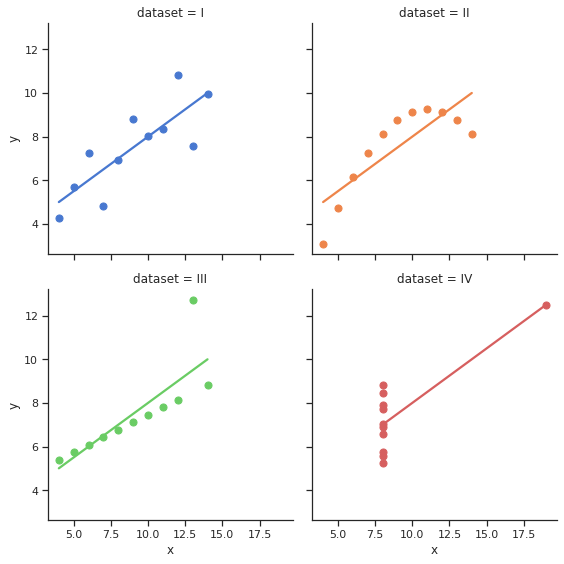

In [ ]:
#@title Ahora analicemos el cuarteto de manera gráfica
import seaborn as sns
sns.set_theme(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

## **Recursos adicionales**

* Hojas trampa - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
* Documentación de pandas -  https://pandas.pydata.org/
* Curso Free Code Camp - https://youtu.be/GPVsHOlRBBI

## **Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*

In [60]:
#HAGAME UNA FUNCION DE FIBONACCI
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)


#LLAMA A LA FUNCION DE FIBONACCI
fibonacci(10)









55